# CS 506 HW1 Solution
Name:Dawei Wang


### 1. Understandking K-means Clustering

(Please fill out the functions in k_means_clustering.py)

In [92]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import folium
from copy import deepcopy
from folium.plugins import HeatMap
import numpy as np


### 2. Working with the Algorithms

In [93]:
from typing import List, Dict, Tuple
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering
# feel free to add more functions such as discard missing examples

def read_dataset(dataset_path: str):
    """
    read in NYC dataset and return a dataset type of your choice
    :param dataset_path: the string path to the dataset file
    :return: dataset
    """
    read = pd.read_csv(dataset_path)
    return read

# The data clusted price by region, the New York has 10 distinct regions, so I think this might be a good starting point.
# clusters = 10
def cluster_nyc_listings(data , n_clusters = 10):
    """
    cluster AirBnb listings using k-means++, hierarchical, and GMM
    :return: 
    """
    # hierarchical cluster
    cluster = AgglomerativeClustering(n_clusters=n_clusters)
    #print(cluster[0])
    hierarchical_cluster = cluster.fit_predict(data)
    
    # GMM cluster
    GMM = GMM(n_components = n_clusters).fir(data)
    GMM_Cluster = gmm.predict_proba(data)
    # K++ cluster
    kmeans_Plus_Plus = KMeans(n_clusters = n_clusters, random_state = 0).fit(data)
    # Compute k-means clustering
    kmeans_Cluster = kmeans.fit_predict(data)
    return GMM_Cluster, kmeans_Cluster, Hierarchical_Cluster

### 2b List a few bullet points describing the pros and cons of the various clustering algorithms.

2a.
GMM: It is flexible in terms of cluster covariance. In GMM, a point belongs to each cluster to a different degree.

K-means:It is relatively simple to implement easy to scales to large data sets, and easily adapts to new examples.
But it can not handle noisy data and outliers

Hierarchical: Easy to sums up the data, good for small data sets. But computationally demanding, fails on larger sets

K++: It removes the drawback of K means which is it is dependent on initialization of centroid

### 3 Data Visualization
### 3a Produce a Heatmap. Is this heatmap useful in order to draw conclusions about the expensiveness of areas within NYC? if not, why?

In [94]:
# find "latitude","longitude","price" in data
df = read_dataset("listings.csv")
var = ["latitude","longitude","price"]
df = df[var]
# Ranges of longitude, latitude and price are different.
# Scaled data points and calculate average prices 
dfScale = (df / df.max().values)


def generate_base_map(default_location: Tuple[float, float]=[40.693943, -73.985880]):
    base_map = folium.Map(location=default_location)
    return base_map
                      
base_map = generate_base_map()
HeatMap(
    data=df[["latitude", "longitude", "price"]]
    .groupby(["latitude", "longitude"])
    .mean()
    .reset_index()
    .values.tolist(),
    radius=8,
    max_zoom=13,
).add_to(base_map).save("index2.html")

In [95]:

base_map.save("index.html")
                      

3a.
Yes, the heat map is usefulin order to draw conclusions about the expensiveness of areas within NYC. The hotter place means it has greater populatation density, there might live more rich prople. And after we clustering the area with similar heat, it is easy to use different color to see the price level in NYC.

### 3b Visualize the clusters by plotting the longitude / lattitude of every listings in a scatter plot

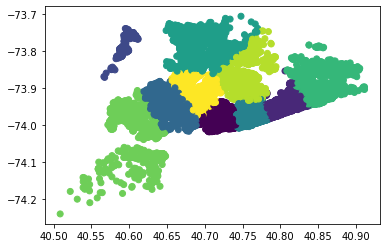

In [120]:


def visualize_clusters(scaled_df , df , n_cluster):
    clusters = KMeans(n_clusters=n_cluster).fit_predict(dfScale[["latitude", "longitude"]])
    # clusted by 10 region
    plt.scatter(df["latitude"],df["longitude"],c = clusters)  
    return plt.show()
visualize_clusters(dfScale ,df , 10)

### 3c For every cluster, report the average price of the listings within this cluster

In [129]:
df2 = read_dataset("listings.csv")
var = ["latitude","longitude","price"]
df2 = df[var]
cluster = 10

clustersL = KMeans(n_clusters = cluster).fit_predict(scaled_df[["latitude", "longitude"]])

# Find average price of the listings within this cluster
df2["cluster"] = clustersL
df2.groupby("cluster",as_index=False).agg({"price" : 'mean'})

,cluster,price
0,0,235.323614
1,1,109.837392
2,2,140.489447
3,3,119.611111
4,4,205.829970
5,5,140.170352
6,6,106.535511
7,7,99.702795
8,8,169.781503
9,9,97.960027


### 3d Bonus point (provide a plot on an actual NYC map)

In [115]:


import numpy as np 

#clusters1 = KMeans(n_clusters=n_cluster).fit_predict(scaled_df[["latitude", "longitude"]])
#plt.scatter(df["latitude"],df["longitude"],c = clusters) 



### 3e Are the findings in agreement with what you have in mind about the cost of living for neighborhoods in NYC? If you are unfamiliar with NYC, you can consult the web.

3e.
Yes. Living in NYC is much expensiver than living in other places. I remembered the average rent rate is around $1800, and it's much expensive in downtown. However, the distribution of the graph is similar with the real life situation.

### 4. Image Manipulation

In [99]:
# You need to add more functions here

def display_image(image):
    cv2.imshow("Display Window", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
 
def cluster_image(image_path: str):
    # read in image
    
    # k means cluster image and reassign pixel value
    
    # display image
    display_image(image)
    


def display_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


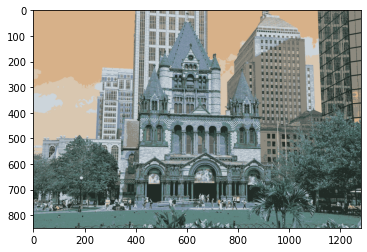

In [126]:
image = cluster_image("test.jpg")
save_image(image,"image.jpg")